In [1]:
import os
import numpy as np
from skimage import io
import pandas as pd

def load_train(count):
    path = 'data/train'
    filenames = os.listdir(path)
    chosen_filenames = np.random.choice(filenames, replace=False, size=count)
    images = np.array([io.imread(os.path.join(path, filename)) for filename in chosen_filenames], dtype=np.float32)
    images = images / 255
    
    label_data = pd.read_csv('data/train_labels.csv')
    chosen_ids = [filename.replace('.tif', '') for filename in chosen_filenames]
    labels = label_data[label_data['id'].isin(chosen_ids)]['label'].values
    return images, labels

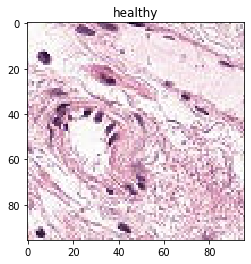

Image shape: (96, 96, 3)
Min value: 0.0, max value: 1.0


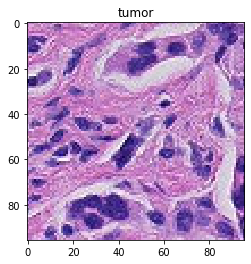

Image shape: (96, 96, 3)
Min value: 0.0, max value: 1.0


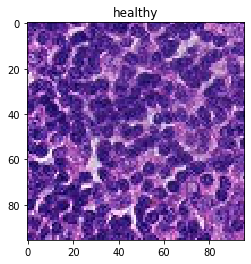

Image shape: (96, 96, 3)
Min value: 0.0, max value: 1.0


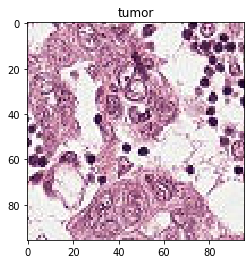

Image shape: (96, 96, 3)
Min value: 0.0, max value: 1.0


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for image, label in zip(*load_train(4)):
    plt.title('tumor' if label == 1 else 'healthy')
    plt.imshow(image)
    plt.show()
    print(f'Image shape: {image.shape}')
    print(f'Min value: {image.min()}, max value: {image.max()}')

In [2]:
images, labels = load_train(1024)

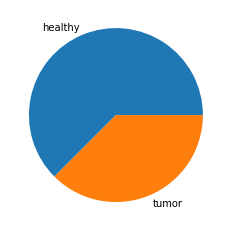

In [28]:
unique, counts = np.unique(labels, return_counts=True)
plt.pie(counts, labels=['healthy' if value == 0 else 'tumor' for value in unique])
plt.show()

In [6]:
import torch

dataset = list(zip(images.swapaxes(1, 3), labels))
image_loader = torch.utils.data.DataLoader(dataset, 32, shuffle=True)

In [41]:
cnn = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
    torch.nn.MaxPool2d(2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3),
    torch.nn.MaxPool2d(2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3),
    torch.nn.MaxPool2d(2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3),
    torch.nn.MaxPool2d(2),
    torch.nn.ReLU(),
    torch.nn.Flatten(),
    torch.nn.Linear(128, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=1e-3)

In [ ]:
from tqdm import tqdm

for epoch in range(4):
    for images, labels in tqdm(image_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [35]:
from sklearn.metrics import accuracy_score 

test_images, test_labels = load_train(100)
outputs = cnn(torch.tensor(test_images.swapaxes(1, 3)))

tensor([], size=(0, 2), dtype=torch.bool)

In [36]:
outputs

tensor([[ 0.1394, -0.0758],
        [ 0.1431, -0.0772],
        [ 0.1397, -0.0828],
        [ 0.1324, -0.0684],
        [ 0.1516, -0.0901],
        [ 0.1440, -0.0822],
        [ 0.1295, -0.0735],
        [ 0.1417, -0.0783],
        [ 0.1290, -0.0812],
        [ 0.1417, -0.0786],
        [ 0.1520, -0.0832],
        [ 0.1391, -0.0666],
        [ 0.1474, -0.0916],
        [ 0.1481, -0.0857],
        [ 0.1460, -0.0805],
        [ 0.1303, -0.0814],
        [ 0.1316, -0.0784],
        [ 0.1457, -0.1027],
        [ 0.1360, -0.0740],
        [ 0.1359, -0.0730],
        [ 0.1299, -0.0749],
        [ 0.1381, -0.0645],
        [ 0.1440, -0.0848],
        [ 0.1394, -0.0754],
        [ 0.1466, -0.0714],
        [ 0.1297, -0.0824],
        [ 0.1393, -0.0863],
        [ 0.1484, -0.0860],
        [ 0.1315, -0.0761],
        [ 0.1500, -0.0716],
        [ 0.1453, -0.0913],
        [ 0.1506, -0.0961],
        [ 0.1454, -0.0792],
        [ 0.1349, -0.0894],
        [ 0.1311, -0.0618],
        [ 0.1459, -0